## Read and Split the Data

get the data  -> unzip the data -> import the libraries -> count the number -> create folder for train, test and validation -> move data from one folder to another.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#  unzip data
!unzip /content/Brain_Tumor_Dataset.zip

Archive:  /content/Brain_Tumor_Dataset.zip
   creating: Brain_Tumor_Dataset/Brain_Tumor/
  inflating: Brain_Tumor_Dataset/Brain_Tumor/Y1.jpg  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/Y10.jpg  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/Y100.JPG  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/Y101.jpg  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/Y102.jpg  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/Y103.jpg  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/Y104.jpg  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/Y105.jpg  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/Y106.jpg  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/Y107.jpg  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/Y108.jpg  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/Y109.JPG  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/Y11.jpg  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/Y111.JPG  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/Y112.JPG  
  inflating: Brain_Tumor_Dataset/Brain_Tumor/Y113.JPG  
  inflating: Brain_

In [3]:
# import the libraries

import os
import glob
import shutil
import math
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# count the number of images

ROOT_DIR = "/content/Brain_Tumor_Dataset"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR,dir)))

number_of_images.items()

dict_items([('Healthy', 98), ('Brain_Tumor', 155)])

In [5]:
def splitData(path,split):

  if not os.path.exists("./" + path):
    os.mkdir("./" + path)
    
    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./" + path + "/" + dir)
      for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir)),
                                  size = (math.floor(split*number_of_images[dir])-2),
                                  replace = False):
        O = os.path.join(ROOT_DIR,dir,img)
        D = os.path.join("./" + path , dir)
        shutil.copy(O,D)
        os.remove(O)
  else:
    print("The folder already exists")

In [6]:
splitData("test", 0.15 )

In [7]:
# count the number of images

ROOT_DIR = "/content/Brain_Tumor_Dataset"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR,dir)))

number_of_images.items()

dict_items([('Healthy', 86), ('Brain_Tumor', 134)])

In [8]:
splitData("val", 0.18)

In [9]:
# count the number of images

ROOT_DIR = "/content/Brain_Tumor_Dataset"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR,dir)))

number_of_images.items()

dict_items([('Healthy', 73), ('Brain_Tumor', 112)])

In [10]:
splitData("train", 1)

In [11]:
# count the number of images

ROOT_DIR = "/content/Brain_Tumor_Dataset"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR,dir)))

number_of_images.items()

dict_items([('Healthy', 2), ('Brain_Tumor', 2)])

## Build a Model

In [12]:
import keras
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.models import Sequential

input layer -> conv layer -> pooling layer -> dropout -> flatten -> dropout -> dense -> output layer

In [13]:
# model

model = Sequential()
model.add(Conv2D(filters= 16, kernel_size =(3,3), activation= 'relu', input_shape = (256,256,3)))

model.add(Conv2D(filters= 32, kernel_size =(3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size= (2,2)))

model.add(Conv2D(filters= 64, kernel_size =(3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size= (2,2)))

model.add(Conv2D(filters= 128, kernel_size =(3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size= (2,2)))

model.add(Dropout(rate = 0.25))

model.add(Flatten())
model.add(Dense(units = 64, activation= 'relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(units = 1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 60, 60, 128)       7

In [14]:
# compile

model.compile(optimizer = 'adam', loss = keras.losses.BCE, metrics= ['accuracy'])

## Pre process the data

In [15]:
from keras.preprocessing.image import ImageDataGenerator

In [16]:
image_data_1 = ImageDataGenerator(zoom_range = 0.2, shear_range = 0.2, rotation_range = 40,
                                horizontal_flip = True, rescale = 1/255)

train_image = image_data_1.flow_from_directory(directory = '/content/train', target_size = (256,256), batch_size = 32, class_mode = 'binary')

Found 181 images belonging to 2 classes.


In [17]:
image_data_2 = ImageDataGenerator(rescale = 1/255)

test_image = image_data_2.flow_from_directory(directory = '/content/test', target_size = (256,256), batch_size = 32, class_mode = 'binary')

Found 33 images belonging to 2 classes.


In [18]:
val_image = image_data_2.flow_from_directory(directory = '/content/val', target_size = (256,256), batch_size = 32, class_mode = 'binary')

Found 35 images belonging to 2 classes.


In [19]:
# early stop and checkpoints

from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor='val_accuracy', min_delta= 0.2, patience = 10, verbose = 1, mode = 'auto')
mcp = ModelCheckpoint(monitor='val_accuracy', filepath= './bestmodel.h5', verbose = 1, save_best_only = True, mode = 'auto')

cb = [es, mcp]

In [21]:
history = model.fit(train_image, epochs = 15, verbose = 1, callbacks = cb, validation_data = val_image)

Epoch 1/15
6/6 [==============================] - ETA: 0s - loss: 0.5004 - accuracy: 0.7735
Epoch 1: val_accuracy did not improve from 0.77143
6/6 [==============================] - 3s 496ms/step - loss: 0.5004 - accuracy: 0.7735 - val_loss: 0.5110 - val_accuracy: 0.7714
Epoch 2/15
6/6 [==============================] - ETA: 0s - loss: 0.5410 - accuracy: 0.7182
Epoch 2: val_accuracy did not improve from 0.77143
6/6 [==============================] - 4s 617ms/step - loss: 0.5410 - accuracy: 0.7182 - val_loss: 0.6670 - val_accuracy: 0.6857
Epoch 3/15
6/6 [==============================] - ETA: 0s - loss: 0.5480 - accuracy: 0.7182
Epoch 3: val_accuracy did not improve from 0.77143
6/6 [==============================] - 3s 485ms/step - loss: 0.5480 - accuracy: 0.7182 - val_loss: 0.5050 - val_accuracy: 0.7714
Epoch 4/15
6/6 [==============================] - ETA: 0s - loss: 0.4756 - accuracy: 0.7569
Epoch 4: val_accuracy did not improve from 0.77143
6/6 [==============================] - 3s

In [22]:
import matplotlib.pyplot as plt

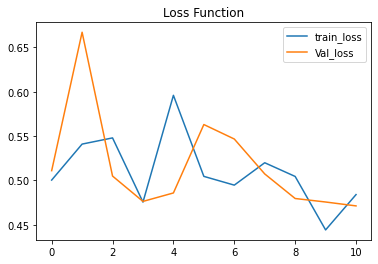

In [23]:
# loss function

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Loss Function')
plt.legend(['train_loss', 'Val_loss'])
plt.show()

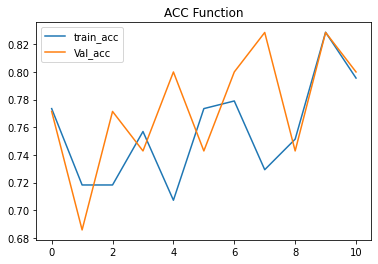

In [24]:
# accuarcy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('ACC Function')
plt.legend(['train_acc', 'Val_acc'])
plt.show()

In [25]:
# model accuracy

from keras.models import load_model

best_model = load_model("/content/bestmodel.h5")

In [26]:
loss, acc = model.evaluate(test_image) 
print('The accuracy score is', acc)

2/2 [==============================] - 0s 157ms/step - loss: 0.3793 - accuracy: 0.8182
The accuracy score is 0.8181818127632141


In [ ]:
y_pred = model.predict(test_image, verbose = 1)

In [34]:
y_pred_classes = (y_pred > 0.5).astype("int32")

In [36]:
y_pred

array([[0.10964774],
       [0.08302811],
       [0.17683439],
       [0.17337649],
       [0.7096987 ],
       [0.09697156],
       [0.80082077],
       [0.8088817 ],
       [0.46671727],
       [0.48562407],
       [0.03850948],
       [0.24679376],
       [0.99939203],
       [0.60894585],
       [0.788583  ],
       [0.05467504],
       [0.71128356],
       [0.06058143],
       [0.41414028],
       [0.08302811],
       [0.0268594 ],
       [0.05467504],
       [0.17265946],
       [0.07095489],
       [0.17221144],
       [0.05728429],
       [0.20996267],
       [0.02759153],
       [0.19788316],
       [0.05752741],
       [0.998939  ],
       [0.26074445],
       [0.4685557 ]], dtype=float32)

In [37]:
y_pred_classes

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0]], dtype=int32)

## Make Prediction

In [43]:
from keras.utils.image_utils import img_to_array, load_img

In [45]:
path = "/content/Brain_Tumor_Dataset/Brain_Tumor/Y170.JPG"

img = load_img(path, target_size = (256,256))

input_arr = img_to_array(img)/255

input_array = np.expand_dims(input_arr, axis =0)

pred_prob = model.predict(input_array)

pred_value = (pred_prob > 0.5).astype("int32")

if pred_value == 0:
  print("Brain Tumor")
else:
  print("Healthy")


1/1 [==============================] - 0s 113ms/step
Brain Tumor
